# Exercise 5.9: Heat capacity of a solid

Debye's theory of solids givesthe heat capacity of a solid at temperature $T$ to be

$$C_V = 9V\rho k_B\bigg(\frac{T}{\theta_D}\bigg)^3\int_0^{\theta_D/T}\frac{x^4e^x}{(e^x-1)^2}\text{d}x$$

where $V$ is the volume of the solid. $\rho$ is the number density of atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the so-called _Debye temperature_, a property of solids that depends on their density and speed of sound.

a) Write a Python cv(T) that calculates $C_V$ for a given value of the temperature, for a sample consisting of 1000 cubic centimeters of solid alumnium, which has a number density of $\rho = 6.022 \times 10^{28}\text{m}^{-3}$ and a Debye temperature of $\theta_D = 428$ K. Use Gaussian quadrature to evaluate the integral, with $N=50$ sample points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxwab # from the online resources for the book

In [5]:
def guass_quad(f, a, b, N):
    
    x, w = gaussxwab(N, a, b)
    I = 0
    for k in range(N):
        I += w[k]*f(x[k])
    return I

In [4]:
def f(x):
    return (x**4 *np.exp(x))/(np.exp(x)-1)**2

In [6]:
def Cv(T):
    '''
    Calculates the heat capacity of a solid block of aluminum
    parameters:
    V = 1000e-8 cubic meter
    rho = 6.022e28 number density 
    thetaD = 428K the debye temperature
    T - float the temperature
    '''
    rho = 6.022e28 # number density of aluminum
    thetaD = 428 # the debye temperature
    V = 1000e-8 # volume of 1000 cubic centimers
    kB = 1.38064852e-23 #Boltzmann's constant
    start = 0
    end = thetaD/T
    N = 50
    
    C = 9*V*rho*kB*(T/thetaD)**3 * guass_quad(f, start, end, N)
    return C

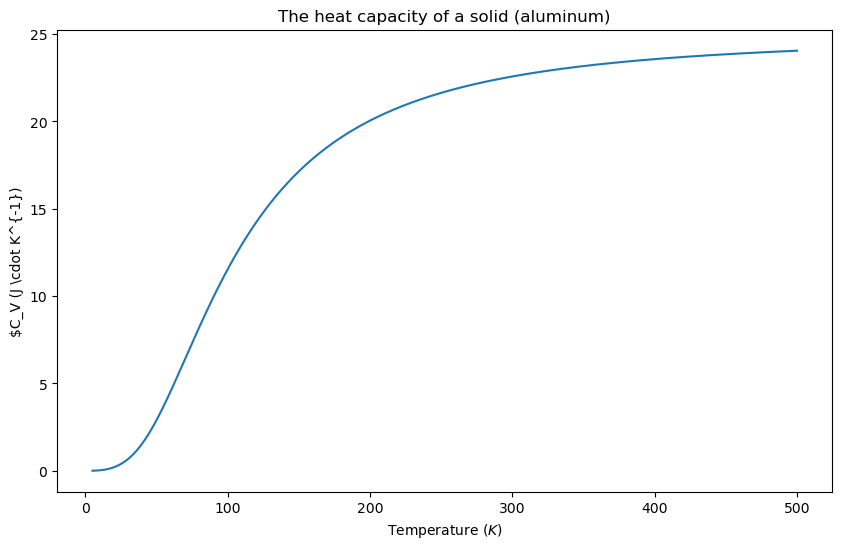

In [8]:
temps = np.linspace(5, 500, 496)

Cs = []

for T in temps:
    Cs.append(Cv(T))
    
plt.figure(figsize=(10,6))
plt.title("The heat capacity of a solid (aluminum)")
plt.xlabel("Temperature ($K$)")
plt.ylabel("$C_V (J \cdot K^{-1})")
plt.plot(temps, Cs)
plt.show()